# Bank Account Opening Fraud Detection using Logistic Regression and XGBoost Models

**Date**: 9 February 2026 \
**Author**: Li Zhaozhi (李兆智)

---

**Background**: Fraud is a type of financial crime risk that poses threats to customers and banks. There're multiple typologies within fraud such as authorised and unauthorised digital, payment, credit card, application, scams, and lending fraud, etc. Financial institutions deploy data science capabilities in banking data to analyse fraud patterns, detect, and mitigate fraud risks.

**Application Fraud, Bank Account Opening**: refers to the deliberate submission of false, forged, or stolen information during the account opening process with the intent to:

- Obtain financial products/services under false pretenses
- Facilitate money laundering or other financial crimes
- Circumvent regulatory controls and due diligence requirements
- Create vehicles for future illicit activities

(Reference: Association of Certified Anti-Money Laundering Specialists (ACAMS))

**Objective**: This solution aims to discern patterns and detect application fraud in the form of bank account opening by applying statistical analysis, data visualisation, hypothesis testing, and machine learning techniques (Logistic Regression and XGBoost) to analyse and model bank account data. This covers the entire (iterative) life cycle from exploratory data analysis (EDA), data cleaning, hypothesis testing, feature engineering, modelling to model evaluation.

**Challenges**: Financial institutions face the following challenges in fraud detection:

- *False positive*: Genuine customers/transactions flagged as fraudulent leading to increased investigation expenses.
- *False negative*: Failure to detect fraudulent customers/transactions leading to financial loss and reputational damage, sometimes regulatory fines.
- *Class imblance*: Fraud data is typically imbalanced which requires processing before modelling.

**Methodologies**: Model governance prioritises explainability in the financial industry. Logistic regression and XGBoost models are used in this analysis.

- *Logistic Regression* is a surpervised learning method that is highly transparent. This dataset has a binary response variable `fraud_bool` with large quantities of numerical and categorical variables available for feature engineering. Logistic regression is an appropriate method for predicting fraud.

- *XGBoost*: A supervised, ensemble tree-based machine learning technique useful for anomaly detection.


## Data Sets and Definitions

**Data Sets**: Feedzai is an AI-powered platform that uses machine learning to detect fraud. Feedzai Research released anonymised [data sets](https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022/data) at NeurIPS 2022 resembling challenges in real-world bank account opening data. These data sets are available in downloadable CSV format. In real world, data is typically stored on a cloud platform and retrieved with SQL queries.

References:

- [Bank Account Fraud Dataset Suite Datasheet](https://github.com/feedzai/bank-account-fraud/blob/main/documents/datasheet.pdf)

This analysis uses the `base` dataset.

Data definitions:

| Num | Variable | Definition | Data Type | Unit | Example |
|--|----------|------------|-----------|------|---------|
|1|fraud_bool|Fraud label (1: Fraud, 0: geunine)|Numerical|N/A|1|
|2|income|Annual income in quantiles|Numerical|N/A|0.3|
|3|name_email_similarity|Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges between [0, 1].|Numerical|N/A|1|
|4|prev_address_months_count| Number of months in previous registered address of the applicant, i.e. the applicant’s previous residence, if applicable. Ranges between [−1, 380] months (-1 is a missing value).|Numerical|Month|2|
|5| current_address_months_count | Months in currently registered address of the applicant. Ranges between [−1, 406] months (-1 is a missing value). |Numerical|Month|100|
|6| customer_age | Applicant’s age in bins per decade (e.g, 20-29 is represented as 20). |Numerical|N/A|30|
|7|days_since_request|Number of days passed since application was done. Ranges between [0, 78] days.|Numerical|Day|12|
|8|intended_balcon_amount|Initial transferred amount for application. Ranges between [−1, 108].|Numerical|USD|100|
|9|payment_type|Credit payment plan type. 5 possible (annonymized) values.|Categorical|N/A|AD|
|10|zip_count_4w|Number of applications within same zip code in last 4 weeks. Ranges between [1, 5767].|Numerical|App|21|
|11|velocity_6h|Velocity of total applications made in last 6 hours i.e., average number of applications per hour in the last 6 hours. Ranges between [−211, 24763].|Numerical|App|12|
|12|velocity_24h|Velocity of total applications made in last 24 hours i.e., average number of applications per hour in the last 24 hours. Ranges between [1329, 9527].|Numerical|App|1400|
|13|velocity_4w| Velocity of total applications made in last 4 weeks, i.e., average number of applications per hour in the last 4 weeks. Ranges between [2779, 7043].|Numerical|App|2779|
|14|bank_branch_count_8w| Number of total applications in the selected bank branch in last 8 weeks. Ranges between [0, 2521].|Numerical|App|12|
|15|date_of_birth_distinct_emails_4w|Number of emails for applicants with same date of birth in last 4 weeks. Ranges between [0, 42].|Numerical|Emails|12|
|16|employment_status|Employment status of the applicant. 7 possible (annonymized) values.|Categorical|N/A|CA|
|17|credit_risk_score|Internal score of application risk. Ranges between [−176, 387].|Numerical|N/A|-100|
|18|email_is_free|Domain of application email (either free or paid).|Numerical|N/A|1|
|19|housing_status|Current residential status for applicant. 7 possible (annonymized) values.|Categorical|N/A|BC|
|20|phone_home_valid|Validity of provided home phone.|Numerical|N/A|1|
|21|phone_mobile_valid|Validity of provided mobile phone.|Numerical|N/A|1|
|22|bank_months_count|How old is previous account (if held) in months. Ranges between [−1, 31] months (-1 is a missing value).|Numerical|Month|1|
|23|has_other_cards|If applicant has other cards from the same banking company.|Numerical|N/A|1|
|24|proposed_credit_limit|Applicant’s proposed credit limit. Ranges between [200, 2000].|Numerical|USD|200|
|25|foreign_request|If origin country of request is different from bank’s country.|Numerical|N/A||
|26|source|Online source of application. Either browser(INTERNET) or mobile app (APP).|Categorical|N/A|Internet|
|27|session_length_in_minutes|Length of user session in banking website in minutes. Ranges between [−1, 107] minutes|Numerical|Minutes|12|
|28|device_os|Operative system of device that made request. Possible values are: Windows, Macintox, Linux, X11, or other.|Categorical|N/A|Windows|
|29|keep_alive_session|User option on session logout.|Numerical|N/A|1|
|30|device_distinct_emails_8w|Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [0, 3].|Numerical|Emails|2|
|31|device_fraud_count|Number of fraudulent applications with used device. Ranges between [0, 1].|Numerical|N/A|0|
|32|month|Month where the application was made. Ranges between [0, 7].|Numerical|Month|2|

## Exploratory Data Analysis
Exploratory data analysis (EDA) involves reading in and making sense of the original data. Descriptive statistics and data visualisations are used to explore this data. This notebook includes all the code used as well as comments on leading research questions and findings.

In [1]:
##### import required libraries - basics
import numpy as np
import pandas as pd

# Hypothesis testing
from scipy.stats import chi2_contingency

# logistic regression packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# xgboost packages
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV

# data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns

### Part 1. Data Quality Assessment

Part 1 of this EDA focuses on data quality assessment to make sure that 1) the data is correctly imported from sources, 2) gain an overall understanding of the different variables including data types, duplicates, and missing values.

In [2]:
# import the dataset
pd.set_option('display.max_columns', None) #display all columns in this notebook

base_original = pd.read_csv("D:\我的文檔\金融犯罪風險\數據分析專案集\Feedzai Bank Account Fraud Dataset\Feedzai Bank Account Fraud Dataset\Base.csv")
base_original.head()

<>:4: SyntaxWarning: invalid escape sequence '\F'
<>:4: SyntaxWarning: invalid escape sequence '\F'
C:\Users\lizha\AppData\Local\Temp\ipykernel_17832\579568708.py:4: SyntaxWarning: invalid escape sequence '\F'
  base_original = pd.read_csv("D:\我的文檔\金融犯罪風險\數據分析專案集\Feedzai Bank Account Fraud Dataset\Feedzai Bank Account Fraud Dataset\Base.csv")


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,7850.955007,6742.080561,5,5,CB,163,1,BC,0,1,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,5745.251481,5941.664859,3,18,CA,154,1,BC,1,1,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,5471.988958,5992.555113,15,11,CA,89,1,BC,0,1,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,6755.344479,5970.336831,11,13,CA,90,1,BC,0,1,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,5124.046930,5940.734212,1,6,CA,91,0,BC,1,1,26,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [3]:
base_original.tail()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,6732.602414,3010.048099,3095.754245,42,8,CA,305,1,BB,1,1,31,0,1500.0,0,INTERNET,16.967770,other,0,1,0,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,1574.293294,2716.495767,4286.089050,0,5,CA,235,0,BA,1,1,-1,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,1258.864938,3601.322892,3103.891664,2,3,CA,195,1,BE,0,1,31,0,200.0,0,INTERNET,16.068595,other,0,1,0,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,7048.137128,6521.395012,3068.265084,7,8,CA,148,0,BD,0,1,1,0,200.0,0,INTERNET,1.378683,linux,1,1,0,7
999999,0,0.6,0.993391,-1,174,30,0.020422,14.942456,AA,655,3737.076479,3135.788094,3051.003293,14,8,CA,100,1,BB,0,1,15,1,200.0,0,INTERNET,1.947926,other,1,1,0,7


In [4]:
# Check the shape of the data set (number of rows and columns)
base_original.shape

(1000000, 32)

In [5]:
# check variable types
base_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

**Comments**

**Q: How many observations and variables are there in this data set?**

This dataset contains 1,000,000 observations and 32 variables.

**Q: How many variables are numerical and categorical respectively?**

Out of the 32 variables, 27 variables are numerical, 5 variables are categorical. Feature transformation converting these categorical variables into numerical values will be required if these 5 variables are selected. These five are `payment_type`, `employment_status`, `housing_status`, `source`, and `device_os`.

**Q: What are the dimensions of these variables in the context of financial crime risk fraud analytics?**

- Financial data: `income`, `intended_balcon_amount`
- Credit data: `credit_risk_score`, `proposed_credit_limit`
- Digital metadata: `device_os`, `device_fraud_count`, 
- Profile data: `name_email_similarity`, `customer_age`, `bank_months_count`, `phome_mobile_valid`, `phone_home_valid`, `email_is_free`, `employment_status`, `housing_status`, `days_since_request`, `zip_count_4w`
- Behavioural data: `session_length_in_minutes`, `keep_alive_session`, `foreign_request`, `velocity_6h`, `velocity_24h`, `velocity_4w`, `prev_address_months_count`, `current_address_month_count`,`source`, `bank_branch_count_8w`, `date_of_birth_distinct_mails_4w`, `device_distinct_emails_8w`
- Datetime data: `month`

In [6]:
# Check if there're missing values in the dataframe.
base_original.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [7]:
# Check if there're missing values in the data set (-1 denotes missing values)
missing_values_mask = base_original[['prev_address_months_count','current_address_months_count','bank_months_count']] == -1
missing_values = {}
for column, flag in missing_values_mask.items():
    missing_values[column] = flag.sum()
missing_values

{'prev_address_months_count': np.int64(712920),
 'current_address_months_count': np.int64(4254),
 'bank_months_count': np.int64(253635)}

**Comments**: 

**Q: Does this data set contain any missing values?**

Yes. Although the data frame has no missing value, according to data definitions, columns `prev_address_months_count`, `current_address_months_count`, and `bank_months_count` have missing values, represented as -1.

**Q: How to deal with missing values in bank account opening?**

Fraudsters may intentionally omit data when applying for bank accounts. Missing data can be indicators of fraud. Therefore, it's worthwhile to investigate the legitimacy and correlation with fraud of these missing values before processing.

In [36]:
# Check if the data is unique or duplicated
base_original.duplicated().sum()

np.int64(0)

In [38]:
base_original.nunique()

fraud_bool                                   2
income                                       9
name_email_similarity                   998861
prev_address_months_count                  374
current_address_months_count               423
customer_age                                 9
days_since_request                      989330
intended_balcon_amount                  994971
payment_type                                 5
zip_count_4w                              6306
velocity_6h                             998687
velocity_24h                            998940
velocity_4w                             998318
bank_branch_count_8w                      2326
date_of_birth_distinct_emails_4w            40
employment_status                            7
credit_risk_score                          551
email_is_free                                2
housing_status                               7
phone_home_valid                             2
phone_mobile_valid                           2
bank_months_c

**Comment**:

There're no row duplicates in this data set. All line records are unique combinations of variables.

### Part 2. Statistical analysis

Statistical analysis in this EDA provides summary statistics of numerical and categorical variables to make sense of the data. This serves as the starting point of deep-dive of univariate and multivariate analyses of the data.

In [8]:
# get descriptive statistics of the numerical variables
base_original.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,4856.324016,184.361849,9.503544,130.989595,0.529886,0.417077,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,919.843934,459.625329,5.033792,69.681812,0.499106,0.493076,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,2825.748405,0.000000,0.000000,-170.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,4268.368423,1.000000,6.000000,83.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,4913.436941,9.000000,9.000000,122.000000,1.000000,0.000000,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,5488.083356,25.000000,13.000000,178.000000,1.000000,1.000000,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,6994.764201,2385.000000,39.000000,389.000000,1.000000,1.000000,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


**Comment**:

**Q: Are there obnormal observations from statistics?**

- There're additional columns such as `session_length_in_minutes` and `device_distinct_emails_8w`, although not highlighted in the data definitions, should not have negative numbers. These findings merit further exploration.

- `name_email_similarity` has a minimum of 0.000001 which represents a significant variance between the account owner's name and email address which may indicate impersonation risk or synthetic identities.

- `credit_risk_score` and high `proposed_credit_limit` are high risk indicators of fraud. Fraudsters are looking for higher credit limits to conduct money laundering.

- Invalid `phone_home_valid` and `phone_mobile_valid` leading to challenges in contacting customers to verify identity can be indicators of risk.

- `customer_age` has a maximum of 90. It's worthwhile to consider the possibility of elderly abuse.

- `device_fraud_count` seems to have 0's across all observations and have little contributing value to predictive modelling. This variable can be dropped from the data set to save compute resources.


In [42]:
# get descriptive statistics of the categorical variables
base_original[['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']].describe()

,payment_type,employment_status,housing_status,source,device_os
count,1000000,1000000,1000000,1000000,1000000
unique,5,7,7,2,5
top,AB,CA,BC,INTERNET,other
freq,370554,730252,372143,992952,342728


**Comment**:

`employment_status` and `housing_status` could be risk indictors. Unemployeed individuals may commit crimes for income.

In [50]:
# check if there is class imbalance.
base_original['fraud_bool'].value_counts(normalize=True) * 100

fraud_bool
0    98.8971
1     1.1029
Name: proportion, dtype: float64

**Comments**:

**Q: Does this data have a class imbalance issue?**

Yes. There're 988,971 (99%) genuine records and 11,029 (1%) fraudulent records. This represents a class imbalance issue that merits further processing before predictive modelling.

**Q: Are there concerns on predictive modelling?**

Yes. The class imbalance issue could lead to 1) bias towards the majority, 2) poor decision boundary, and 3) inflated accuracy issues when building models. ROC-AUC, recall, and FPR shall be used for thresholding the models instead.

### Part 3. Missing values analysis

Given fraudsters may intentionally omit data when applying for bank accounts, missingness is an indicator of fraud risk. This section of the EDA assesses whether missing values are correlated with fraud.

**Q: Are the missing values in `prev_address_months_count`, `current_address_months_count`, and `bank_months_count` correlated with fraud?**

In [51]:
# Label missing values: convert -1 into 1 to flag missing values; rest as 0.
# Create new binary features to check whether there are missing data.
columns_missing = ['prev_address_months_count','current_address_months_count','bank_months_count']
for column in columns_missing:
    base_original[f'{column}_missing'] = (base_original[column] == -1).astype(int)

In [11]:
# Check the relationship between missing values and the fraud label
columns_missing_labelled = ['prev_address_months_count_missing','current_address_months_count_missing','bank_months_count_missing']
for column in columns_missing_labelled:
    summary = (
        base_original.groupby(column)['fraud_bool']
            .agg(['count','mean'])
            .rename(columns={'mean': 'fraud_rate'})
    )
    print('\n- - - - - -\n')
    print(summary)

print(f'\n Baseline fraud rate: {base_original['fraud_bool'].mean()}')


- - - - - -

                                    count  fraud_rate
prev_address_months_count_missing                    
0                                  287080    0.003118
1                                  712920    0.014215

- - - - - -

                                       count  fraud_rate
current_address_months_count_missing                    
0                                     995746    0.011062
1                                       4254    0.003291

- - - - - -

                            count  fraud_rate
bank_months_count_missing                    
0                          746365    0.009230
1                          253635    0.016323

 Baseline fraud rate: 0.011029


**Comments**:

- Missing `prev_address_months_count` is correlated with fraudulent account opening.
- Missing `bank_months_count` is correlated with fraudulent account opening.
- Having `current_address_months_count` is correlated with fraudulent account opening.

**Chi-square test for independence between these variables and statistical significance**

$\text{H}_0$: Missing values in these variables are independent of fraud outcome. \
$\text{H}_1$: Missing values in these variables are not independent of fraud outcome.

In [12]:
# Perform chi-square test to validate meaningfulness
for column in columns_missing_labelled:
    contingency = pd.crosstab(base_original[column], base_original['fraud_bool'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    n = contingency.sum().sum()
    phi = np.sqrt(chi2 / n) 
    print(f"{column}: \n chi-square = {chi2:.4f} \n p-value = {p:.4f} \n phi coefficient = {phi:.4f} \n sample size = {n} \n\n")

prev_address_months_count_missing: 
 chi-square = 2309.7136 
 p-value = 0.0000 
 phi coefficient = 0.0481 
 sample size = 1000000 


current_address_months_count_missing: 
 chi-square = 22.7452 
 p-value = 0.0000 
 phi coefficient = 0.0048 
 sample size = 1000000 


bank_months_count_missing: 
 chi-square = 872.4251 
 p-value = 0.0000 
 phi coefficient = 0.0295 
 sample size = 1000000 




**Comment**: 

Given that the p-values are all smaller than 0.05, we reject the null hypothesis. All these results have statistical significance. However, Chi-square is sensitive to sample size. The Phi coefficients are small which suggests these features alone have marginal predictive power and are more useful when used in combination with other features.

Phi coefficient measures how strong their association is with fraud outcome, ranked from the highest to the lowest: `prev_address_months_count_missing` > `bank_months_count_missing` > `current_address_months_count_missing`.

### Part 4. Univariate analysis

Univariate analysis focuses on individual variables. Activities include anomaly detection, distribution, and correlation analyses using statistics, visualisation, and hypothesis testing.

**Q: Are there anomalies in numerical variables? Are these correlated with fraud?**

In [47]:
def boxploter(dataset, x_variable, y_variable):
    """This helper function automates box plots."""
    plt.figure(figsize=(5,5))
    sns.boxplot(data=dataset, x=x_variable, y=y_variable)
    plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
    plt.xlabel('Fraud Label')
    plt.title(f'{y_variable} vs Fraud')
    plt.show()

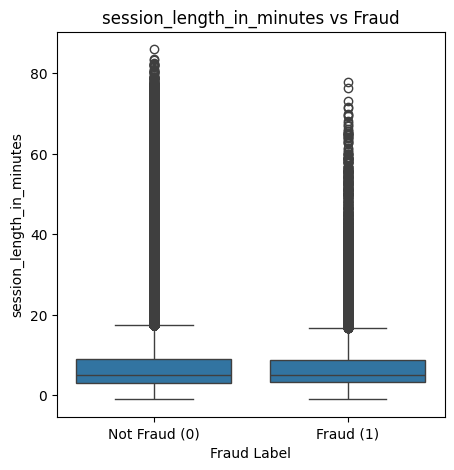

In [32]:
# session_length_in_minutes
boxploter(base_original, "fraud_bool", "session_length_in_minutes")

**Comment**:

- Yes. Both Fraud and Not Fraud groups in `session_length_in_minutes` have outliers and -1. -1 is an invalid value for session length in minutes.

- The boxplots show very similar distributions between Not Fraud and Fraud session lengths in minutes. This means `session_length_in_minutes` alone is a weak predictor of fraud. Not Fraud is slightly more spread out than Fraud whilst sharing a similar median.

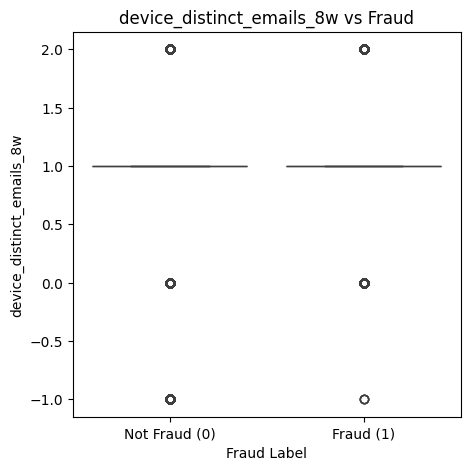

In [33]:
# device_distinct_emails_8w
boxploter(base_original, "fraud_bool", "device_distinct_emails_8w")

**Comment**:

- Yes. Both Fraud and Not Fraud groups in `device_distinct_emails_8w` have outliers and -1. -1 is an invalid value for session length in minutes.

- The boxplots show very similar distributions between Not Fraud and Fraud session lengths in minutes. This means `device_distinct_emails_8w` alone is a weak predictor of fraud. Not Fraud is slightly more spread out than Fraud whilst sharing a similar median.

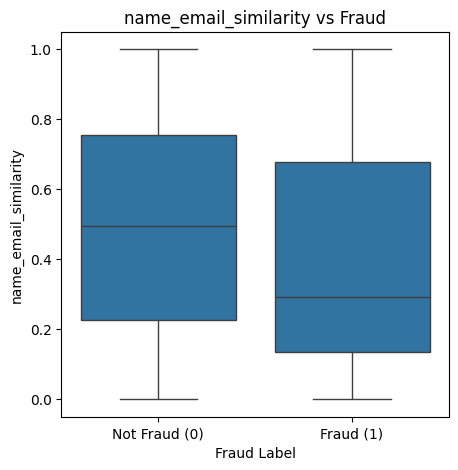

In [43]:
# name_email_similarity
boxploter(base_original, "fraud_bool", "name_email_similarity")

**Comment**:

- It's clear from this boxplot that Fraud have lower `name_email_similarity` than Not Fraud because fraudsters tend to use synthetic identities. Lower `name_email_similarity` is correlated with fraud.

- The median of `name_email_similarity` of Not Fraud is 0.5 which is much higher than 0.3 of Fraud records. This graph shows that `name_email_similarity` is a strong predictor of fraud. 

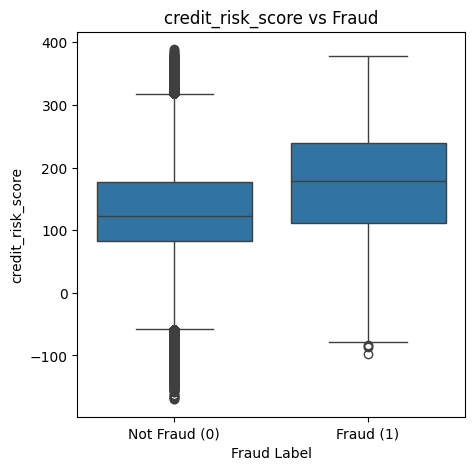

In [48]:
# credit_risk_score
boxploter(base_original, "fraud_bool", "credit_risk_score")

**Comment**:

- The boxplots show quite different distributions of credit risk scores between Fraud and Not Fraud. Fraud have higher credit risk score and more spread out than Not Fraud.
  
- Higher `credit_risk_score` is correlated with Fraud. `credit_risk_score` is a strong predictor of fraud.

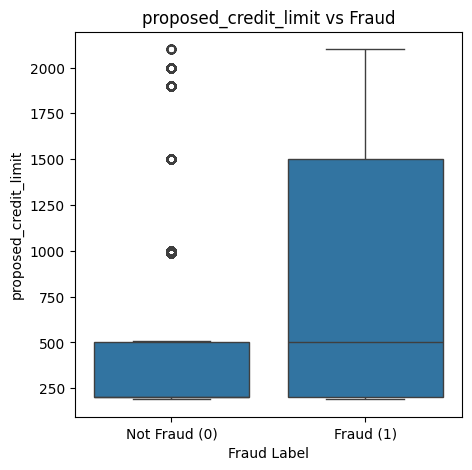

In [49]:
# proposed_credit_limit
boxploter(base_original, "fraud_bool", "proposed_credit_limit")

**Comment**:

- The distributions are quite different between Not Fraud and Fraud where fraudulent account opening have much wider spread and higher proposed credit limit than Not Fraud. This makes sense because fraudsters are looking for more credits than usual to launder illicit funds with multiple mules.

## Data Cleaning and Preparation

In [52]:
# keep the response variable and selected features
keep_variables = ['fraud_bool','foreign_request', 'prev_address_months_count_missing', 'bank_months_count_missing', 'employment_status', 'housing_status', 'name_email_similarity', 'credit_risk_score', 'proposed_credit_limit']
base_model_data = base_original[keep_variables]
base_model_data.head()

,fraud_bool,foreign_request,prev_address_months_count_missing,bank_months_count_missing,employment_status,housing_status,name_email_similarity,credit_risk_score,proposed_credit_limit
0,0,0,1,0,CB,BC,0.986506,163,1500.0
1,0,0,1,0,CA,BC,0.617426,154,1500.0
2,0,0,0,0,CA,BC,0.996707,89,200.0
3,0,0,0,0,CA,BC,0.475100,90,200.0
4,0,0,1,0,CA,BC,0.842307,91,200.0


## Feature Engineering

## Logistic Regression

## Model Evaluation: Logistic Regression